<a href="https://colab.research.google.com/github/educhile1/challenge_datascience1-ONE/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



array([[<Axes: title={'center': 'Precio'}>,
        <Axes: title={'center': 'Costo de envío'}>],
       [<Axes: title={'center': 'Calificación'}>,
        <Axes: title={'center': 'lat'}>],
       [<Axes: title={'center': 'lon'}>, <Axes: >]], dtype=object)

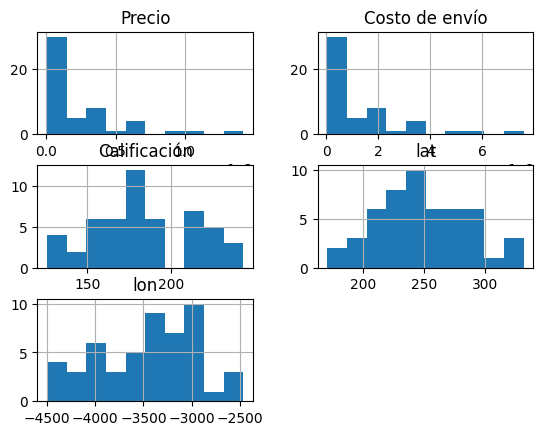

In [3]:
import pandas as pd
import matplotlib as plt




url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()


dataTienda= pd.DataFrame(tienda)

dataTienda.head(20)
#dataTienda.groupby(['Producto']).sum().head(20)


#dataTienda.info()
%matplotlib inline


dataTienda= dataTienda.drop(columns=['Cantidad de cuotas'])

dataTienda.groupby("Producto").sum().hist()




#1. Análisis de facturación



# 2. Ventas por categoría

# 3. Calificación promedio de la tienda


# 4. Productos más y menos vendidos

# 5. Envío promedio por tienda